# Machine Learning 




1. Get the data: data collection
2. Get a sense of the data: data visualization
3. Make the data useful: clean it
4. Choose a model (after making some assumptions about the data)
5. Train the model 
6. Evaluate the model
7. Tune the model and try to explain it

# Task: Predict the class of iris flower.

5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class (Species)

# Import libraries and load data

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('data/IRIS.csv')
print(df.shape)
df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizations

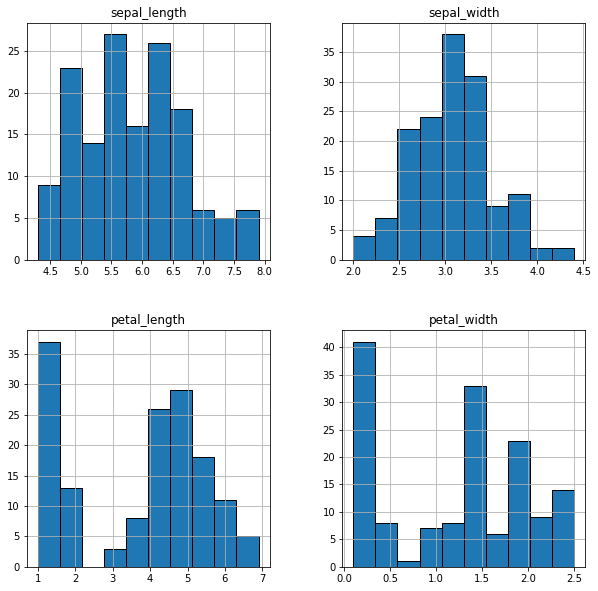

In [27]:
df.hist(edgecolor='black',figsize=(10,10))
plt.show()

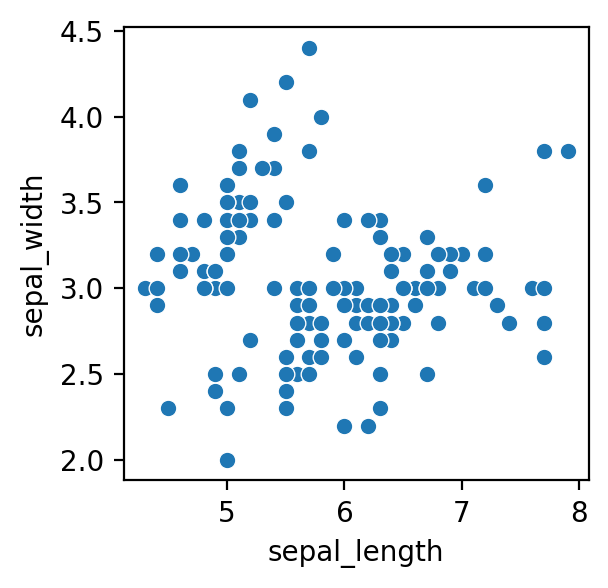

In [18]:
plt.figure(figsize=(3, 3), dpi=200)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

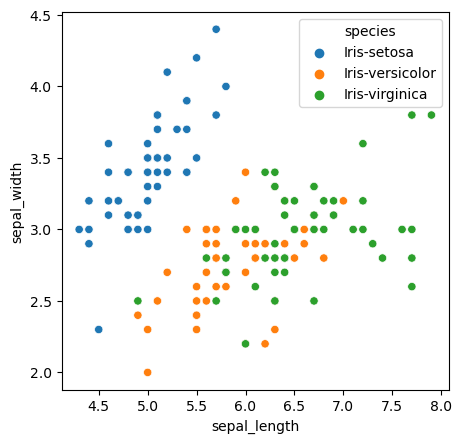

In [21]:
plt.figure(figsize=(5, 5), dpi=100)
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue=df.species)
plt.show()

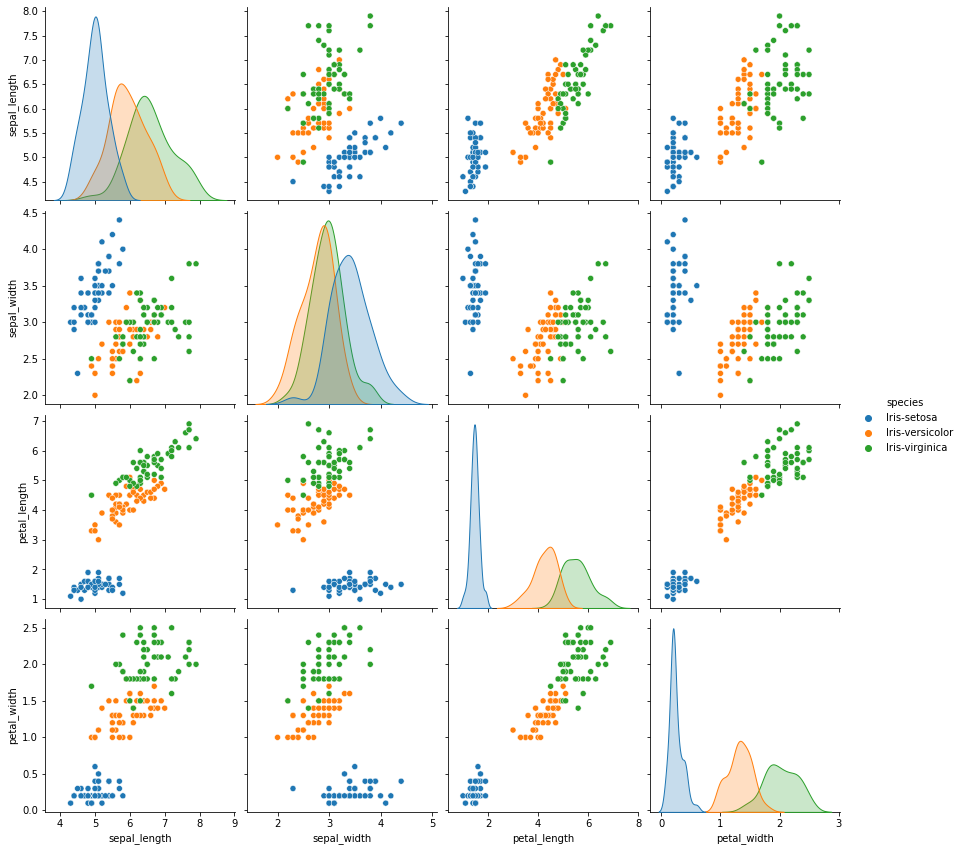

In [23]:
sns.pairplot(df, hue='species', height=3);
plt.show()

# Split Data

In [36]:
# Handle categorical
df.species = df.species.astype('category').cat.codes
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [44]:
from sklearn.model_selection import train_test_split



X = df.drop('species', axis=1)
y = df.species

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


# Modelling

In [68]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=50, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [69]:
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)


/Users/v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/v/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [71]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_acc:.3f}")

test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {test_acc:.3f}")

Training accuracy: 0.895
Training accuracy: 0.933


In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train.values)
y_test_pred = lr.predict(X_test.values)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {train_acc:.3f}")

test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_acc:.3f}")

Train accuracy: 0.981
Test accuracy: 0.978


# Neural Networks (MLP)

In [64]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train.values)
y_test_pred = clf.predict(X_test.values)

train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_acc:.3f}")

test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {test_acc:.3f}")


Training accuracy: 0.333
Training accuracy: 0.333
